In [1]:
from __future__ import print_function
#datapreprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import sklearn
#os.environ["CUDA_VISIBLE_DEVICES"]="0" 

#speed values_2013

data_2013=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/2013_sw_speed.csv")  ####change location
 

#speedvalues
data_y_2013=data_2013[72:4380]
duration_2013=data_y_2013.iloc[:,4].values
data_speed_2013=data_y_2013.iloc[:,3].values 
print(data_y_2013.shape)

#speed values_2014

data_2014=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/2014_sw_speed.csv")  ####change location
 

#speedvalues
data_y_2014=data_2014[49:4380]
duration_2014=data_y_2014.iloc[:,4].values
data_speed_2014=data_y_2014.iloc[:,3].values 

#speed values_2015

data_2015=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2015.csv")  ####change location
 

#speedvalues
data_y_2015=data_2015[49:4380]
duration_2015=data_y_2015.iloc[:,4].values
data_speed_2015=data_y_2015.iloc[:,3].values 



#speed values 2017 
data=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/solar_wind_latest_2017.csv")  ####change location
 

#speedvalues
data_y_2017=data[49:4380]
duration=data_y_2017.iloc[:,4].values
data_speed=data_y_2017.iloc[:,3].values 

#speed_values_2018
data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")  ####change location
 

#speedvalues
data_y_2018=data_2018[49:4380]
data_2018_ac=data_2018.iloc[:,3].values
duration_2018=data_y_2018.iloc[:,4].values
data_speed_2018=data_y_2018.iloc[:,3].values 




#merging all data

train_y1=data_y_2013.append(data_y_2014)
train_y2=train_y1.append(data_y_2015)
train_y3=train_y2.append(data_y_2017)
#train_y1=train_y_inter.append(data_y_2015)

(4308, 5)


In [2]:
trainy_speed=train_y3.iloc[:,3].values
trainy_speed.shape

(17301,)

In [3]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

In [4]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
tf.python.test.is_gpu_available(cuda_only=True)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
import numpy as np
#Loading training data
train_x=np.load('/home/hemapriya/ML_SDO/train_images_2021_logn.npy')

In [8]:
train_x.shape

(17301, 512, 512)

In [9]:
data_x = train_x.reshape(train_x.shape[0], 512,512,1)
print(data_x.shape)


(17301, 512, 512, 1)


In [10]:
#LOading testing data
test_2018=np.load('/home/hemapriya/ML_SDO/img_2018_logn.npy')


In [11]:
len(test_2018)

4380

In [12]:
test_x1 = test_2018.reshape(test_2018.shape[0], 512,512,1)
test_x=test_x1[0:4331]
print((test_x).shape)

(4331, 512, 512, 1)


# For resize - Train

In [14]:
data_x = train_x

In [15]:
data_x.resize((17301,224,224),refcheck=False)

In [16]:
data_x.shape

(17301, 224, 224)

In [17]:
data_x = np.repeat(data_x[..., np.newaxis], 3, -1)

In [18]:
data_x.shape

(17301, 224, 224, 3)

# For Resize- Test

In [19]:
test_x1 = test_2018

In [20]:
test_x1.resize((4331,224,224),refcheck=False)

In [21]:
test_x1= np.repeat(test_x1[..., np.newaxis], 3, -1)

In [22]:
test_x1.shape

(4331, 224, 224, 3)


# Train Test Split

In [13]:
#splitting
from sklearn.model_selection import train_test_split
train_x1,val_x,train_y1,val_y=train_test_split(data_x,trainy_speed,test_size=0.2,random_state=0)

In [14]:
print(train_y1.shape)
print(data_speed_2018.shape)
print(val_y.shape)
print(train_x1.shape)
print(test_x.shape)
print(val_x.shape)

(13840,)
(4331,)
(3461,)
(13840, 512, 512, 1)
(4331, 512, 512, 1)
(3461, 512, 512, 1)


In [15]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [16]:

#importing keras libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
#from tensorflow.python.keras import convolutional
#from tensorflow.keras.layers import pooling
#from tensorflow.keras.layers import core
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
#import tensorflow.keras.backend as K

In [116]:
#CNN architecture


#keras.backend.clear_session()
model_8 = Sequential()
model_8.add(Conv2D(32, (8,8),strides=(2, 2), input_shape=(512,512,1)))
model_8.add(Activation('relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_8.add(Conv2D(64, (2,2),strides=(2, 2)))
model_8.add(Activation('relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_8.add(Conv2D(128, (2,2),strides=(2, 2)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2),strides=(1, 1)))

### 4th Layer
model_8.add(Conv2D(256, (2,2),strides=(2, 2)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(MaxPooling2D(pool_size=(3, 3),strides=(1, 1)))
###

model_8.add(Flatten())
model_8.add(Dense(4096,activation='relu'))
model_8.add(Dropout(.3))
model_8.add(Dense(1,activation='linear'))
model_8.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mse',metrics=['mse'])
print(model_8.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 253, 253, 32)      2080      
_________________________________________________________________
activation (Activation)      (None, 253, 253, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 63, 63, 64)        8256      
_________________________________________________________________
activation_1 (Activation)    (None, 63, 63, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

# Base Architecture

In [106]:
model_1 = Sequential()
model_1.add(Conv2D(32, (2,2),strides=(2, 2), input_shape=(512,512,1)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_1.add(Conv2D(64, (2,2),strides=(2, 2)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_1.add(Conv2D(128, (2,2),strides=(2, 2)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

# Flattening
model_1.add(Flatten())
model_1.add(Dense(4096,activation='relu'))
model_1.add(Dropout(.3))
model_1.add(Dense(1,activation='linear'))
model_1.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mse',metrics=['mse'])
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      160       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       3

# Architecture 2

In [40]:
model_2 = Sequential()
model_2.add(Conv2D(32, (2,2),strides=(2, 2), input_shape=(512,512,1)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_2.add(Conv2D(64, (2,2),strides=(2, 2)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_2.add(Conv2D(128, (2,2),strides=(2, 2)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_2.add(Conv2D(256, (2,2),strides=(2, 2)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

# Flattening
model_2.add(Flatten())
model_2.add(Dense(4096,activation='relu'))
model_2.add(Dropout(.3))
model_2.add(Dense(1,activation='linear'))
model_2.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mse',metrics=['mse'])
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      160       
_________________________________________________________________
activation_4 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
activation_5 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)      

# Architecture 3

In [129]:
model_3 = Sequential()
model_3.add(Conv2D(32, (2,2),strides=(2, 2), input_shape=(512,512,1)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_3.add(Conv2D(64, (2,2),strides=(2, 2),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_3.add(Conv2D(128, (2,2),strides=(2, 2),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_3.add(Conv2D(256, (2,2),strides=(2, 2),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model_3.add(Conv2D(512, (2,2),strides=(2, 2),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same'))

# Flattening
model_3.add(Flatten())
model_3.add(Dense(4096,activation='relu'))
model_3.add(Dropout(.3))
model_3.add(Dense(1,activation='linear'))
model_3.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mse',metrics=['mse'])
print(model_3.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 32)      160       
_________________________________________________________________
activation_3 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)      

# Architecture 4

In [28]:
droprate = 0.25
model_4 = Sequential()
model_4.add(Conv2D(32, (3,3), padding="same", input_shape=(512,512,1), activation="relu")) 
model_4.add(BatchNormalization())
model_4.add(Dropout(droprate))
model_4.add(MaxPooling2D(pool_size=(5,5)))
model_4.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(3,3)))
model_4.add(Dropout(droprate))

model_4.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(3,3)))
model_4.add(Dropout(droprate))

model_4.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(3,3)))
model_4.add(Dropout(0.5))  
model_4.add(Flatten())
model_4.add(Dense(256, activation="relu")) #
model_4.add(BatchNormalization())
model_4.add(Dense(1,activation='linear'))
model_4.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mse',metrics=['mse'])
print(model_4.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 512, 512, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 512, 512, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 102, 102, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 102, 102, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 102, 102, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0

# Feature Extraction using CNN... Then using Standard ML ALgo

In [27]:
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Model

In [28]:
model = ResNet50()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [29]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [30]:
features = model.predict(data_x)
test_features = model.predict(test_x1)
print(features.shape)
print(test_features.shape)

(17301, 2048)
(4331, 2048)


In [32]:
df = pd.DataFrame(features)
df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.243292,0.0,0.168509,0.013156,0.209956,0.000000,0.182363,0.0,0.215017,0.0,...,0.154043,0.0,0.015374,0.030807,0.0,0.000000,2.757802,1.774734,0.000000,0.026065
1,0.000609,0.0,0.032815,0.000000,0.005449,0.000000,0.359052,0.0,0.000000,0.0,...,0.006493,0.0,0.123548,0.000000,0.0,0.000000,0.393730,0.476808,0.000000,0.027312
2,0.000167,0.0,0.085523,0.000000,0.067543,0.000000,0.105014,0.0,0.000000,0.0,...,0.000000,0.0,0.343074,0.379190,0.0,0.000000,0.622350,0.543798,0.000000,0.000000
3,0.029412,0.0,0.118134,0.000000,0.000000,0.000000,0.363433,0.0,0.000000,0.0,...,0.000000,0.0,0.314039,0.004888,0.0,0.000000,0.365688,0.301486,0.000000,0.000000
4,0.066231,0.0,0.000000,0.139883,0.000000,0.000000,0.043069,0.0,0.003147,0.0,...,0.068785,0.0,0.049387,0.034385,0.0,0.000000,2.482554,0.518963,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17296,0.001846,0.0,0.262586,0.000000,0.000000,0.000000,0.174046,0.0,0.000000,0.0,...,0.024459,0.0,0.077873,0.010211,0.0,0.000000,0.386892,0.605491,0.000000,0.000000
17297,0.010076,0.0,0.007026,0.213279,0.000000,0.000000,0.058528,0.0,0.000000,0.0,...,0.009747,0.0,0.011766,0.048656,0.0,0.000000,1.563901,0.589473,0.000000,0.000000
17298,0.137748,0.0,0.525512,0.031121,0.746659,0.031126,0.938735,0.0,0.842643,0.0,...,0.294210,0.0,0.004059,0.000000,0.0,0.074632,1.670837,3.886736,0.218627,0.000000
17299,0.000000,0.0,0.039145,0.008520,0.269679,0.000000,0.427719,0.0,0.000000,0.0,...,0.073914,0.0,0.062285,0.038889,0.0,0.000000,0.991596,0.412391,0.000000,0.000465


In [37]:
testdf = pd.DataFrame(test_features)
testdf

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.356503,0.0,0.777304,0.000000,0.016226,0.000000,0.071128,0.0,0.342147,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.655498,2.732285,0.033181,0.000000
1,0.172364,0.0,0.053246,0.007234,0.000000,0.000000,0.089443,0.0,0.058138,0.000000,...,0.000000,0.0,0.000000,0.027927,0.0,0.0,0.188619,0.888519,0.000000,0.000000
2,0.007741,0.0,0.265848,0.004382,0.000000,0.000000,0.066462,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.270675,0.0,0.0,0.109953,1.030264,0.000000,0.000000
3,0.040855,0.0,0.048630,0.000000,0.000000,0.000000,0.261973,0.0,0.059896,0.000000,...,0.000000,0.0,0.000000,0.086343,0.0,0.0,0.070832,0.516087,0.000000,0.000000
4,0.147108,0.0,0.021141,0.064994,0.000000,0.000000,0.159788,0.0,0.149802,0.000000,...,0.060436,0.0,0.058520,0.000000,0.0,0.0,0.658503,2.938974,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4326,0.336406,0.0,0.876272,0.000000,0.047059,0.000000,0.155118,0.0,0.259322,0.000000,...,0.000000,0.0,0.000000,0.003465,0.0,0.0,0.524247,3.761711,0.175610,0.000000
4327,0.030466,0.0,0.070977,0.004835,0.017644,0.000000,0.348761,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.039459,0.0,0.0,0.061575,0.190713,0.000000,0.001130
4328,0.018333,0.0,0.135784,0.000281,0.001894,0.000000,0.450503,0.0,0.000000,0.000000,...,0.000000,0.0,0.007879,0.297342,0.0,0.0,0.009189,0.207147,0.000000,0.000000
4329,0.049819,0.0,0.099989,0.003316,0.000000,0.000000,0.121141,0.0,0.000000,0.005697,...,0.000000,0.0,0.000000,0.146080,0.0,0.0,0.049908,0.480447,0.000000,0.018237


In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50, random_state=22)
pca.fit(features)
train_x = pca.transform(features)

In [146]:
df1 = pd.DataFrame(train_x)
df1

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,17.906559,-2.852635,6.754799,-3.142426,2.815664,0.127481,-0.890637,-2.601198,-0.394747,-0.371639,...,0.242060,0.952173,-0.170496,-0.420800,0.627696,0.028717,0.100652,0.309841,-1.209216,-0.686547
1,-10.534799,0.726671,-2.223731,-3.288913,-0.528326,-2.268641,3.272289,-0.025316,-4.498029,-0.363170,...,0.191054,-0.084378,0.146270,0.210842,0.108523,-0.343586,0.587369,0.032933,0.088620,-0.396851
2,-8.060741,0.858550,6.416372,5.642821,-4.779096,0.838375,-1.303573,-4.055253,0.428583,-3.308797,...,-0.330763,-0.792779,0.974355,-0.198520,0.537705,-0.284539,-0.199632,0.638940,0.585184,1.073063
3,-11.831262,4.054921,-0.192873,2.759046,0.949312,1.987135,-2.172401,-4.938745,1.691884,-1.397019,...,-0.338717,0.376696,-0.457452,0.296896,0.145722,0.410969,-0.011490,-0.087871,-0.062482,-0.234563
4,8.701767,-8.977201,-6.710306,-0.265004,3.088678,-0.287072,1.584875,0.784986,3.473802,-0.965744,...,0.239118,0.303612,0.386834,0.238240,-0.166178,-0.041226,-0.250609,0.105288,-0.400505,0.004991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17296,-6.636728,-2.973953,2.407635,3.870144,-2.135172,-3.473503,1.178561,0.111916,0.267530,-1.863847,...,-0.721069,0.026008,-0.873498,-0.331850,-0.397669,0.397646,-0.666325,0.099662,0.023341,-0.028832
17297,6.780522,-8.964349,-1.803697,-2.873014,-3.111956,0.492194,0.018357,1.490960,2.694170,-1.235921,...,-0.569976,-0.580011,-0.046462,-0.162521,0.784638,0.376881,-0.238287,0.126069,-0.334299,0.005218
17298,19.346867,11.846666,12.678246,-3.601895,-1.921525,0.303745,0.953581,-3.205554,1.829219,2.343428,...,0.460632,-0.241913,-0.009800,-1.029147,0.160414,0.915136,-0.470950,-1.021441,0.187642,-0.597535
17299,-7.125478,-1.762656,-2.322326,-5.471586,-1.490583,-1.800300,2.602904,0.191906,-3.105944,-0.385487,...,-0.237406,-0.313081,0.301857,-0.524397,0.459749,-0.297779,0.789037,0.319298,-0.330084,-0.096640


In [147]:
pca.fit(test_features)
test_x = pca.transform(test_features)

In [148]:
df2 = pd.DataFrame(test_x)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,15.277363,6.496039,10.019945,-2.728855,-3.990253,2.542962,1.049937,-1.999010,-0.080859,0.015243,...,-0.637121,-1.070646,0.273230,-0.085827,-0.298850,0.269960,-0.781146,-0.198776,-0.019042,0.622777
1,-9.746595,0.004434,0.830575,-1.172207,2.153799,-0.904597,-0.296624,1.116570,0.840075,-3.029432,...,0.187069,0.282942,-0.648385,0.068519,0.357692,-0.072500,-0.024189,0.001671,0.099020,-0.425390
2,-11.129354,-3.287426,-1.154755,-4.845455,-2.207531,-0.560005,0.108950,-1.570103,0.958624,-0.215784,...,0.352292,1.032662,-0.249227,0.088375,0.327738,0.569004,-0.199865,-0.201171,0.368268,-0.220377
3,-9.729406,-4.120234,-0.394411,-0.521464,2.118617,-1.521598,0.753897,-3.649478,-1.037062,-0.579320,...,-0.493941,0.741119,-0.149229,0.445841,0.108239,0.091958,0.759753,0.126481,0.238131,-0.212871
4,5.588361,6.196176,-5.226663,1.939559,2.142359,3.561183,2.689397,1.159477,1.700318,-2.294673,...,0.716418,0.988088,-1.346305,0.131269,0.620942,-0.703682,0.974206,0.393869,-0.326571,0.046018


In [149]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [158]:
xg_reg = xgb.XGBRegressor(predictor='gpu_predictor')

In [159]:
xg_reg.fit(train_x,trainy_speed)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=96, num_parallel_tree=1,
             objective='reg:squarederror', predictor='gpu_predictor',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [160]:
preds = xg_reg.predict(test_x)

In [161]:
rmse = np.sqrt(mean_squared_error(data_speed_2018, preds))
print("RMSE: %f" % (rmse))

RMSE: 102.721219


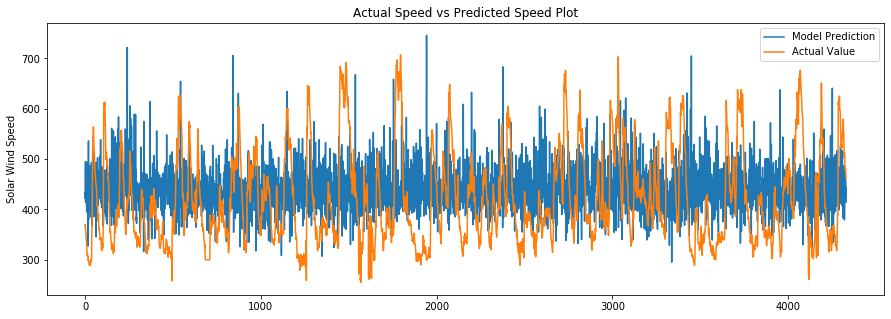

In [162]:
plt.figure(figsize=(15,5))
plt.plot(preds,label = 'Model Prediction')
plt.title('Actual Speed vs Predicted Speed Plot')
plt.plot(data_speed_2018 , label = 'Actual Value')
plt.xlabel('')
plt.ylabel('Solar Wind Speed')
plt.legend()
plt.show()

In [163]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(train_x, trainy_speed)  

/home/hemapriya/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [164]:
rfpred = regressor.predict(test_x)

In [165]:
rmse = np.sqrt(mean_squared_error(data_speed_2018, rfpred))
print("RMSE: %f" % (rmse))

RMSE: 102.348808


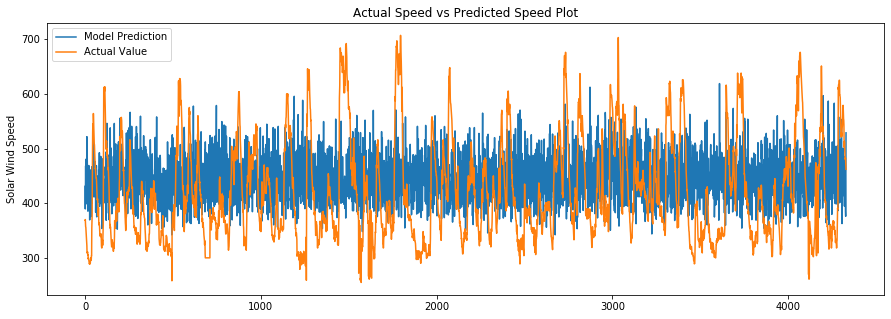

In [166]:
plt.figure(figsize=(15,5))
plt.plot(rfpred,label = 'Model Prediction')
plt.title('Actual Speed vs Predicted Speed Plot')
plt.plot(data_speed_2018 , label = 'Actual Value')
plt.xlabel('')
plt.ylabel('Solar Wind Speed')
plt.legend()
plt.show()

In [180]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(max_depth=15,random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(train_x, trainy_speed)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [181]:
dtreepred = regressor.predict(test_x)

In [182]:
rmse = np.sqrt(mean_squared_error(data_speed_2018, dtreepred))
print("RMSE: %f" % (rmse))

RMSE: 114.361468


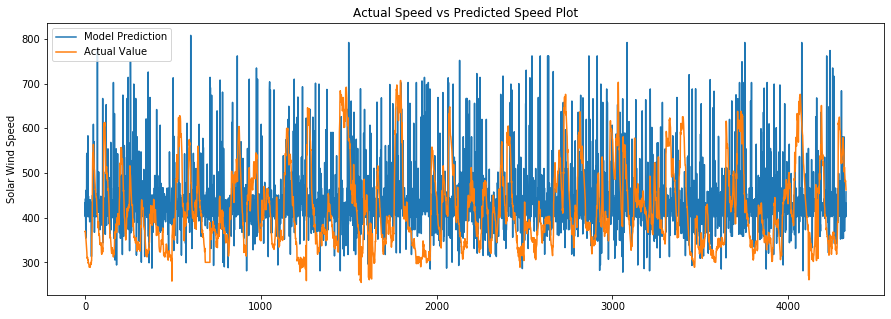

In [183]:
plt.figure(figsize=(15,5))
plt.plot(dtreepred,label = 'Model Prediction')
plt.title('Actual Speed vs Predicted Speed Plot')
plt.plot(data_speed_2018 , label = 'Actual Value')
plt.xlabel('')
plt.ylabel('Solar Wind Speed')
plt.legend()
plt.show()

# Clear GPU

In [136]:
model_2 = Sequential()
model_2.add(Conv2D(16, (2,2),strides=(2, 2), padding='same',input_shape=(512,512,1)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_2.add(Conv2D(32, (2,2),strides=(2, 2)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_2.add(Conv2D(64, (2,2),strides=(2, 2)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_2.add(Conv2D(128, (2,2),strides=(2, 2)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

####


####

# Flattening
model_2.add(Flatten())
model_2.add(Dense(2048,activation='relu'))
model_2.add(Dropout(.3))
model_2.add(Dense(1,activation='linear'))
model_2.compile(optimizer=optimizers.Adam(lr=0.0001), loss='mse',metrics=['mse'])

In [137]:
# load model....best till now
# model_2 = keras.models.load_model('arch_86')

In [138]:
tf.keras.backend.clear_session()

In [139]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [132]:
#training
early_stop = keras.callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
history=model_2.fit(train_x1,train_y1,batch_size=64,epochs=7,validation_data=(val_x,val_y),callbacks=[early_stop])

Epoch 1/7
217/217 [==============================] - 15s 70ms/step - loss: 4386.8203 - mse: 4386.8203 - val_loss: 5046.5005 - val_mse: 5046.5005
Epoch 2/7
217/217 [==============================] - 15s 70ms/step - loss: 4148.0576 - mse: 4148.0576 - val_loss: 4264.5063 - val_mse: 4264.5063
Epoch 3/7
217/217 [==============================] - 12s 56ms/step - loss: 3971.2715 - mse: 3971.2715 - val_loss: 4218.5942 - val_mse: 4218.5942
Epoch 4/7
217/217 [==============================] - 14s 64ms/step - loss: 3874.9421 - mse: 3874.9421 - val_loss: 4057.8076 - val_mse: 4057.8076
Epoch 5/7
217/217 [==============================] - 15s 67ms/step - loss: 3718.7231 - mse: 3718.7231 - val_loss: 4008.9868 - val_mse: 4008.9868
Epoch 6/7
217/217 [==============================] - 13s 61ms/step - loss: 3567.1147 - mse: 3567.1147 - val_loss: 4018.5635 - val_mse: 4018.5635
Epoch 7/7
217/217 [==============================] - 13s 60ms/step - loss: 3586.3809 - mse: 3586.3809 - val_loss: 3924.6477 - val_

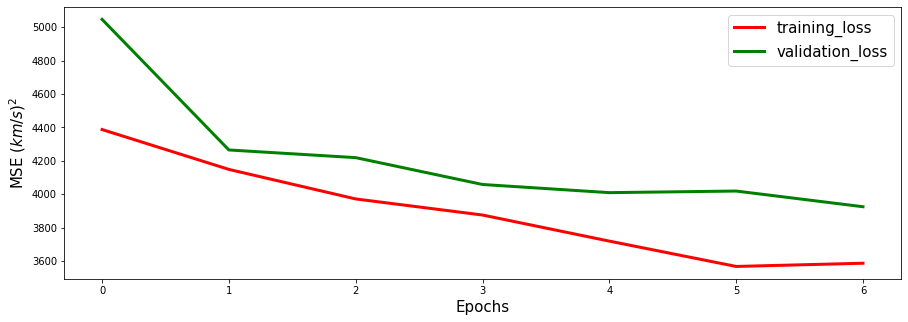

In [133]:
##validation loss


#plotting loss
plt.figure(figsize=(15,5))

plt.plot(history.history['loss'],linewidth=3.0,color='red')
plt.plot(history.history['val_loss'],linewidth=3.0,color='green')
#plt.title('Training loss',fontsize=15)
plt.ylabel('MSE $(km/s)^2$',fontsize=15)
plt.xlabel('Epochs',fontsize=15)
plt.legend(['training_loss', 'validation_loss'],fontsize=15)
#plt.xticks(xi, x)
#plt.yticks(y)
#plt.tick_params(labelsize=20)          
plt.show()

In [134]:
y_test1=model_2.predict(test_x)

In [135]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.array(y_test1).reshape(4331),data_speed_2018))

100.76639798876175

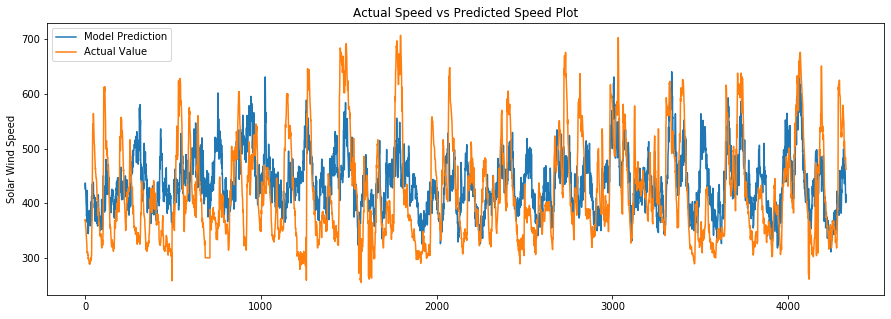

In [71]:
plt.figure(figsize=(15,5))
plt.plot(y_test1,label = 'Model Prediction')
plt.title('Actual Speed vs Predicted Speed Plot')
plt.plot(data_speed_2018 , label = 'Actual Value')
plt.xlabel('')
plt.ylabel('Solar Wind Speed')
plt.legend()
plt.show()

In [72]:
err=y_test1.reshape(4331)-data_speed_2018
np.sqrt(np.var(err))

81.82006899031289

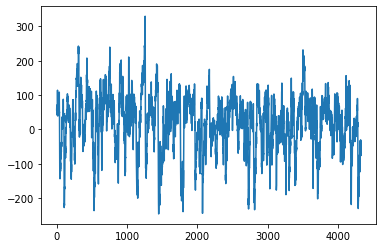

In [73]:
plt.plot(err)

In [74]:
np.corrcoef(np.array(y_test1).reshape(4331),data_speed_2018)

array([[1.        , 0.45688346],
       [0.45688346, 1.        ]])

# Approach 3

In [30]:
vHe2 = train_y3['vHe2']

average = vHe2.mean()
print(average)
    
   

435.15201433443156


In [31]:
new_train = train_y3[(train_y3['vHe2']>435)]
new_train

,year,day,hr,vHe2,duration
151,2013,13,14,439.0,3.92
152,2013,13,16,454.0,3.78
153,2013,13,18,468.0,3.67
154,2013,13,20,540.0,3.18
155,2013,13,22,536.0,3.20
...,...,...,...,...,...
4324,2017,361,8,455.0,3.73
4325,2017,361,10,451.0,3.76
4326,2017,361,12,451.0,3.76
4327,2017,361,14,455.0,3.73


In [112]:
newspeed = new_train["vHe2"].values

In [49]:
indexes=[]
for index, row in train_y3.iterrows():
    if (row['vHe2']>435):
        indexes.append(index)

In [50]:
len(indexes)

7096

In [89]:
test_indexes =[]
actual_val = []
for indes,row in data_y_2018.iterrows():
    if(row['vHe2']>435):
        test_indexes.append(index)
        actual_val.append(row['vHe2'])

In [90]:
len(test_indexes)

1486

In [91]:
len(actual_val)

1486

In [53]:
train_x = []

for i in indexes:
    train_x.append(data_x[i])

In [60]:
train_x = np.array(train_x)

In [61]:
train_x.shape

(7096, 512, 512, 1)

In [66]:
test_x = []

for i in test_indexes:
    test_x.append(test_2018[i])

In [67]:
test_x = np.array(test_x)

In [70]:
test_x = test_x.reshape(test_x.shape[0], 512,512,1)

In [71]:
test_x.shape

(1486, 512, 512, 1)

In [114]:
#splitting
from sklearn.model_selection import train_test_split
train_x1,val_x,train_y1,val_y=train_test_split(train_x,newspeed,test_size=0.2,random_state=0)

In [130]:
#training
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model_3.fit(train_x1,train_y1,batch_size=32,epochs=11,validation_data=(val_x,val_y),callbacks=early_stop)

Epoch 1/11
178/178 [==============================] - 8s 45ms/step - loss: 24426.6328 - mse: 24425.0664 - val_loss: 7172.6021 - val_mse: 7171.2051
Epoch 2/11
178/178 [==============================] - 8s 47ms/step - loss: 7175.6157 - mse: 7174.3198 - val_loss: 7123.2358 - val_mse: 7122.0063
Epoch 3/11
178/178 [==============================] - 8s 43ms/step - loss: 7103.7690 - mse: 7102.5469 - val_loss: 7069.4263 - val_mse: 7068.2021
Epoch 4/11
178/178 [==============================] - 8s 47ms/step - loss: 6851.1733 - mse: 6849.9438 - val_loss: 6867.7935 - val_mse: 6866.5674
Epoch 5/11
178/178 [==============================] - 8s 43ms/step - loss: 6828.0986 - mse: 6826.8696 - val_loss: 6515.2373 - val_mse: 6514.0078
Epoch 6/11
178/178 [==============================] - 9s 48ms/step - loss: 6466.2305 - mse: 6465.0020 - val_loss: 6536.5459 - val_mse: 6535.3135
Epoch 7/11
178/178 [==============================] - 7s 42ms/step - loss: 6293.1274 - mse: 6291.8936 - val_loss: 6142.0020 - va

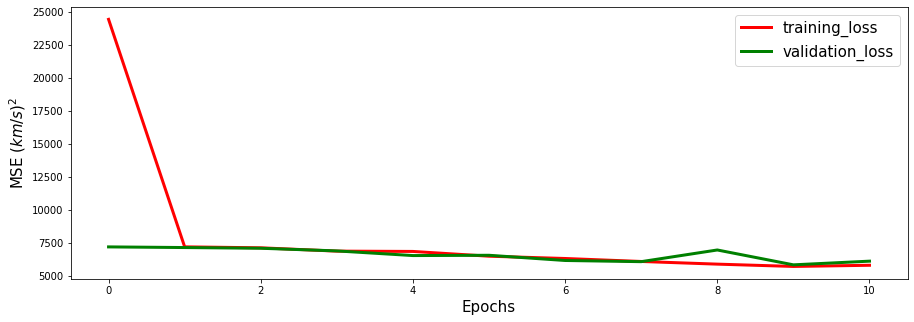

In [131]:
##validation loss


#plotting loss
plt.figure(figsize=(15,5))

plt.plot(history.history['loss'],linewidth=3.0,color='red')
plt.plot(history.history['val_loss'],linewidth=3.0,color='green')
#plt.title('Training loss',fontsize=15)
plt.ylabel('MSE $(km/s)^2$',fontsize=15)
plt.xlabel('Epochs',fontsize=15)
plt.legend(['training_loss', 'validation_loss'],fontsize=15)
#plt.xticks(xi, x)
#plt.yticks(y)
#plt.tick_params(labelsize=20)          
plt.show()

In [132]:
y_test1=model_2.predict(test_x)

In [133]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.array(y_test1).reshape(1486),actual_val))

137.58242523581796

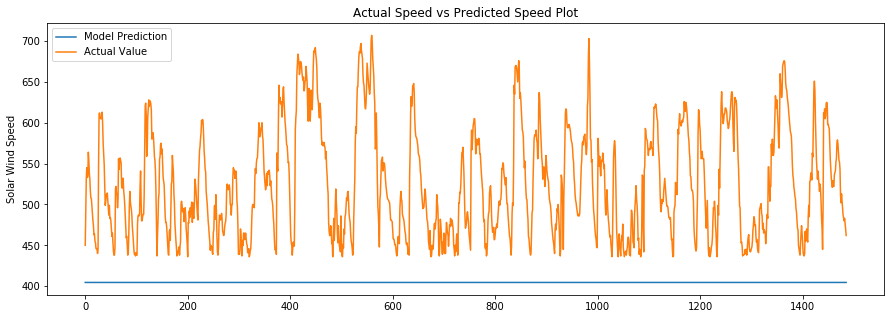

In [134]:
plt.figure(figsize=(15,5))
plt.plot(y_test1,label = 'Model Prediction')
plt.title('Actual Speed vs Predicted Speed Plot')
plt.plot(actual_val, label = 'Actual Value')
plt.xlabel('')
plt.ylabel('Solar Wind Speed')
plt.legend()
plt.show()

In [125]:
actual_val

[450.0,
 491.0,
 531.0,
 545.0,
 533.0,
 534.0,
 564.0,
 554.0,
 538.0,
 531.0,
 516.0,
 508.0,
 507.0,
 497.0,
 489.0,
 480.0,
 474.0,
 463.0,
 464.0,
 455.0,
 453.0,
 446.0,
 446.0,
 445.0,
 440.0,
 445.0,
 547.0,
 611.0,
 612.0,
 608.0,
 605.0,
 605.0,
 605.0,
 613.0,
 598.0,
 574.0,
 560.0,
 549.0,
 526.0,
 499.0,
 504.0,
 512.0,
 511.0,
 514.0,
 505.0,
 495.0,
 487.0,
 499.0,
 483.0,
 484.0,
 480.0,
 471.0,
 461.0,
 465.0,
 455.0,
 443.0,
 438.0,
 438.0,
 447.0,
 519.0,
 522.0,
 514.0,
 512.0,
 496.0,
 507.0,
 556.0,
 543.0,
 552.0,
 557.0,
 554.0,
 551.0,
 524.0,
 520.0,
 532.0,
 532.0,
 517.0,
 510.0,
 501.0,
 486.0,
 470.0,
 459.0,
 461.0,
 450.0,
 438.0,
 441.0,
 463.0,
 496.0,
 516.0,
 504.0,
 498.0,
 494.0,
 486.0,
 472.0,
 464.0,
 454.0,
 444.0,
 439.0,
 440.0,
 437.0,
 441.0,
 438.0,
 438.0,
 476.0,
 486.0,
 487.0,
 486.0,
 488.0,
 522.0,
 541.0,
 505.0,
 480.0,
 480.0,
 485.0,
 488.0,
 488.0,
 511.0,
 569.0,
 621.0,
 624.0,
 610.0,
 559.0,
 568.0,
 607.0,
 618.0,
 628.0,


In [126]:
y_test1

array([[404.56564],
       [404.56564],
       [404.56564],
       ...,
       [404.5656 ],
       [404.5656 ],
       [404.5656 ]], dtype=float32)

In [46]:
#model_8.load_weights('/home/hemapriya/ML_SDO/models/train_weights_183l_frgb.h5')

In [47]:
model_8.predict(test_x[1500].reshape(1,512,512,1))

array([[-0.6917455]], dtype=float32)

In [139]:
np.corrcoef(np.array(y_test1).reshape(4331),data_speed_2018)

array([[1.        , 0.35869618],
       [0.35869618, 1.        ]])

In [54]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.array(y_test1).reshape(4331),testy_ph1_2017))

NameError: name 'testy_ph1_2017' is not defined

In [35]:
err=y_test1.reshape(4331)-data_speed_2018
np.sqrt(np.var(err))

79.49899086511803

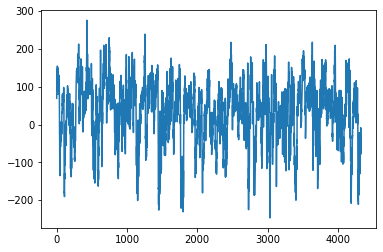

In [36]:
plt.plot(err)